<a href="https://colab.research.google.com/github/EgorDudyrev/caspailleur/blob/main/Tutorial_with_BobRoss_paintings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study Bob Ross paintings with Caspailleur

![Bob Ross hardcover book photo](https://m.media-amazon.com/images/I/A1BxQEoVjjL._AC_UF1000,1000_QL80_.jpg)
*Bob Ross: The Joy of Painting Hardcover – Illustrated, October 10, 2017 @ Available at [Amazon](https://www.amazon.com/Bob-Ross-Joy-Painting/dp/0789332973)*

Load the dataset, described in "A Statistical Analysis of the Work of Bob Ross" by Walt Hickey at [FiveThirtyEight](https://fivethirtyeight.com/features/a-statistical-analysis-of-the-work-of-bob-ross/)

In [1]:
import pandas as pd

url = 'https://pkgstore.datahub.io/five-thirty-eight/bob-ross/elements-by-episode_csv/data/c01dcab932c6e70122e9f924caece31b/elements-by-episode_csv.csv'
df = pd.read_csv(url)
df = df.drop(columns='title').set_index('episode')
assert (df.values.astype(bool)==df.values).all(),  "The data is not binary"

print(df.shape)
df.head()

(403, 67)


,apple_frame,aurora_borealis,barn,beach,boat,bridge,building,bushes,cabin,cactus,...,tomb_frame,tree,trees,triple_frame,waterfall,waves,windmill,window_frame,winter,wood_framed
episode,,,,,,,,,,,,,,,,,,,,,
s01e01,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
s01e02,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
s01e03,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
s01e04,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
s01e05,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


The dataset contains 403 rows representing the episodes of the show and 67 binary columns representing what was drawn on the painting at each episode

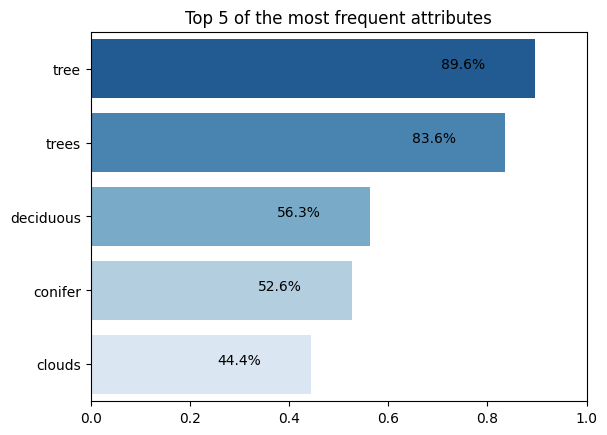

In [2]:
top_attributes = df.mean(0).sort_values(ascending=False).head(5)

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=top_attributes.values, y=top_attributes.index, palette='Blues_r')
for m_i, support in enumerate(top_attributes):
  plt.text(support-0.1, m_i, f"{support:.1%}", ha='right',)
plt.title('Top 5 of the most frequent attributes')
plt.xlim(0, 1)
plt.show()

Let us install `caspailleur` package

In [3]:
!pip install caspailleur --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import caspailleur as csp
csp.__version__

'0.1.2'

The function `explore_data(...)` allows computing all characteristic attribute sets at once and obtain the result in a human-readable manner.

In [ ]:
%%time
csp_data = csp.explore_data(df.values.astype(bool), min_sup=0.1)

CPU times: user 17 s, sys: 74.8 ms, total: 17.1 s
Wall time: 49.9 s


In [ ]:
print(type(csp_data))
list(csp_data)

<class 'dict'>


['intents',
 'keys',
 'passkeys',
 'pseudo_intents',
 'proper_premises',
 'intents_ordering',
 'linearity',
 'distributivity']

In [ ]:
print(type(csp_data['intents']), len(csp_data['intents']))
csp_data['intents'][100]

<class 'list'> 195


frozenset({51, 58, 59})

In [ ]:
print(type(csp_data['keys']), len(csp_data['keys']))
{key for key, intent_i in csp_data['keys'].items() if intent_i == 100}

<class 'dict'> 410


{frozenset({51, 59})}

In [ ]:
print(','.join(df.columns[[51, 59]]), '=>', df.columns[58])

snow,trees => tree


## All attribute sets, step by step

### intents

Almost everything inside `caspailleur` is processed via `frozenbitarray`s that are tuple of 1s and 0s.

Here we define a function to convert subset of attributes, represented with `frozenbitarray` in a human readable descriptions.

In [6]:
def verbose(barray: 'frozenbitarray', names=df.columns):
  return ','.join(names[list(barray.itersearch(True))])

In [7]:
%%time
itemsets_ba = csp.np2bas(df.values)
intents = csp.list_intents_via_LCM(itemsets_ba, min_supp=1)
print(len(intents))

3463
CPU times: user 1.02 s, sys: 0 ns, total: 1.02 s
Wall time: 1.45 s


In [8]:
intent = intents[3075]
intent

frozenbitarray('0000000000000000100000000011000010000100000000000000100000100000001')

Function `.itersearch(True)` gives the indices of 1s in the bitarray. Function `.find(True)` gives the index of the first 1 in the bitarray.

In [10]:
list(intent.itersearch(True)), intent.find(True)

([16, 26, 27, 32, 37, 52, 58, 66], 16)

In [11]:
verbose(intent)

'deciduous,framed,grass,lake,mountain,snowy_mountain,tree,wood_framed'

### keys

IMPORTANT. The set of intents, passed to `csp.list_keys()` should contain all (frequent) intents of the dataset.

In [12]:
%%time
keys_dict = csp.list_keys(intents)
print(len(keys_dict))

10253
CPU times: user 527 ms, sys: 5.95 ms, total: 533 ms
Wall time: 537 ms


Thanks to bitarrays, the set of 10 thousand keys requires only 91K of memory for storing.

In [14]:
with open('keys_list.bal', 'wb') as file:
  csp.base_functions.save_balist(file, list(keys_dict))

!ls -lh keys_list.bal

-rw-r--r-- 1 root root 91K Jun 21 12:09 keys_list.bal


In [15]:
with open('keys_list.bal', 'rb') as file:
  assert list(keys_dict) == list(csp.base_functions.load_balist(file))

Let us study the keys of the previously selected intent

In [16]:
keys_per_intent = [key for key, intent_i in keys_dict.items() if intents[intent_i]==intent]
[verbose(key) for key in keys_per_intent]

['wood_framed', 'deciduous,framed,grass,lake,snowy_mountain']

In [17]:
for key in keys_per_intent:
  print(f"{verbose(key)} => {verbose(intent)}")

wood_framed => deciduous,framed,grass,lake,mountain,snowy_mountain,tree,wood_framed
deciduous,framed,grass,lake,snowy_mountain => deciduous,framed,grass,lake,mountain,snowy_mountain,tree,wood_framed


In [18]:
for key in keys_per_intent:
  print(f"{verbose(key)} => {verbose(intent&~key)}")

wood_framed => deciduous,framed,grass,lake,mountain,snowy_mountain,tree
deciduous,framed,grass,lake,snowy_mountain => mountain,tree,wood_framed


Function `csp.list_keys(intents)` outputs the keys for all the `intents` in the lattice. However, if one needs the keys for only a few intents, these keys can be found via equivalence class of the intent.

In [19]:
%%time
attribute_extents = csp.np2bas(df.values.T)

CPU times: user 1.29 ms, sys: 0 ns, total: 1.29 ms
Wall time: 1.3 ms


In [21]:
%%time
equiv_class = csp.mine_equivalence_classes.iter_equivalence_class(attribute_extents, intents[1000])
keys_per_single_intent = csp.mine_equivalence_classes.list_keys_via_eqclass(equiv_class)
print(keys_per_single_intent)

[frozenbitarray('0000000000000101100000000000000000000000000000000000000010000000000'), frozenbitarray('0000000000000101000000000000000000000000000000000000000010100000000')]
CPU times: user 683 µs, sys: 0 ns, total: 683 µs
Wall time: 634 µs


In [22]:
%%time
equiv_class = csp.mine_equivalence_classes.iter_equivalence_class(attribute_extents, intent)
keys_per_single_intent = csp.mine_equivalence_classes.list_keys_via_eqclass(equiv_class)
print(keys_per_single_intent)

[frozenbitarray('0000000000000000100000000011000010000000000000000000100000000000000'), frozenbitarray('0000000000000000000000000000000000000000000000000000000000000000001')]
CPU times: user 3.63 ms, sys: 0 ns, total: 3.63 ms
Wall time: 5.05 ms


In [24]:
set(keys_per_intent) == set(keys_per_single_intent)

True

### passkeys

In [25]:
%%time
passkeys_dict = csp.list_passkeys(intents)
print(len(passkeys_dict))

4854
CPU times: user 450 ms, sys: 1.73 ms, total: 452 ms
Wall time: 456 ms


In [26]:
pkeys_per_intent = [pkey for pkey, intent_i in passkeys_dict.items() if intents[intent_i]==intent]
[verbose(pkey) for pkey in pkeys_per_intent]

['wood_framed']

## Proper premises

In [27]:
%%time
proper_premises = list(csp.iter_proper_premises_via_keys(intents, keys_dict))
print(len(proper_premises))

7040
CPU times: user 69.1 ms, sys: 0 ns, total: 69.1 ms
Wall time: 73.3 ms


There are 7040 proper premises in the data. So let us compute the proper premises for only the frequent intents.

In [29]:
attribute_extents_sets = list(csp.base_functions.bas2isets(attribute_extents))
extents = [csp.base_functions.extension(intent.itersearch(True), attribute_extents_sets) for intent in intents]
supports = [len(extent) for extent in extents]

In [30]:
import numpy as np

support_thold = int(0.05*supports[0])
intents_freq_idxs = list((np.array(supports)>=support_thold).nonzero()[0])
support_thold, len(intents_freq_idxs)

(20, 571)

In [32]:
intents_freq = [intents[intent_i] for intent_i in intents_freq_idxs]
keys_dict_freq = {
    key: intents_freq_idxs.index(intent_i)
    for key, intent_i in keys_dict.items()
    if intent_i in set(intents_freq_idxs)
}

In [33]:
%%time
proper_premises_freq = list(csp.iter_proper_premises_via_keys(intents_freq, keys_dict_freq))
print(len(proper_premises_freq))

55
CPU times: user 4.63 ms, sys: 0 ns, total: 4.63 ms
Wall time: 4.74 ms


In [34]:
print(type(proper_premises_freq), len(proper_premises_freq))
proper_premises_freq[0]

<class 'list'> 55


(frozenbitarray('0001000000000000000000000000000000000000000000000000000000000000000'),
 17)

In [35]:
for ppremise, intent_i in proper_premises_freq:
  print(f"{verbose(ppremise)} => {verbose(intents_freq[intent_i]&~ppremise)}")

beach => ocean
bushes => tree
cabin => tree
conifer => tree
deciduous => tree
fog => tree
oval_frame => framed
river => tree
snow => tree
snowy_mountain => mountain
trees => tree
waterfall => tree
waves => ocean
winter => tree
bushes,conifer => tree,trees
cabin,mountain => tree,trees
clouds,mountains => mountain
conifer,deciduous => tree,trees
conifer,framed => tree,trees
cumulus,mountains => clouds,mountain,tree
cumulus,river => clouds,tree,trees
deciduous,mountains => mountain,tree
deciduous,winter => snow,tree
grass,mountains => mountain,tree
grass,path => tree
grass,structure => tree
lake,mountains => tree
lake,structure => tree
mountain,structure => cabin,tree,trees
mountains,river => mountain,tree
mountains,snowy_mountain => mountain,tree
ocean,rocks => waves
path,structure => tree
bushes,clouds,lake => tree,trees
bushes,clouds,mountains => mountain,tree,trees
bushes,clouds,river => tree,trees
bushes,grass,mountain => tree,trees
bushes,mountain,river => tree,trees
cabin,conifer,l

Note that there is an implication _clouds,mountains => mountain_. And there is no implication _mountains => mountain_. That seems strange.


In [38]:
s = df['mountains']<=df['mountain']
s[s==False]

episode
s29e02    False
dtype: bool

In [39]:
df.loc['s29e02', ['mountain', 'mountains',]]

mountain     0
mountains    1
Name: s29e02, dtype: int64

Maybe, "mountain" implies that the mountain should be at the front of the picture? [Bob Ross season 29 episode 2 on Youtube](https://youtu.be/2XnIdinwot0?t=1374)

### pseudo_intents

Pseudo-intents are defined in a recursive way. Thus, the more pseudo-intents we find, the longer it takes to find the next pseudo-intent.

In [40]:
%%time
#pseudo_intents = csp.list_pseudo_intents_via_keys(
#    keys_intent_map=keys_dict.items(), intents=intents,
#    use_tqdm=True, n_keys=len(keys_dict)
#)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


However, we can compute the pseudo-intents of the frequent intents quite easily.

In [41]:
%%time
pseudo_intents_freq = csp.list_pseudo_intents_via_keys(
    keys_intent_map=keys_dict_freq.items(), intents=intents_freq,
    use_tqdm=True, n_keys=len(keys_dict_freq)
)
print('\n', len(pseudo_intents_freq))

Iterate p.intent candidates: 100%|██████████| 574/574 [00:00<00:00, 4491.42it/s]


 53
CPU times: user 97.7 ms, sys: 0 ns, total: 97.7 ms
Wall time: 145 ms


In [42]:
print(type(pseudo_intents_freq), len(pseudo_intents_freq))
print(pseudo_intents_freq[0])

<class 'list'> 53
(frozenbitarray('0000000000000000000000000000000000000000000000000000000000000000010'), 61)


In [43]:
for pintent, intent_i in pseudo_intents_freq:
  print(f"{verbose(pintent)} => {verbose(intents_freq[intent_i]&~pintent)}")

winter => tree
waves => ocean
waterfall => tree
trees => tree
snowy_mountain => mountain
snow => tree
river => tree
oval_frame => framed
fog => tree
deciduous => tree
conifer => tree
cabin => tree
bushes => tree
beach => ocean
path,structure => tree
ocean,rocks => waves
mountain,structure => cabin,tree,trees
lake,structure => tree
lake,mountains => tree
grass,structure => tree
grass,path => tree
grass,mountains => mountain,tree
cumulus,mountains => clouds,mountain,tree
clouds,mountains => mountain
mountain,mountains,snowy_mountain => tree
mountains,river,tree => mountain
deciduous,tree,winter => snow
deciduous,mountains,tree => mountain
cumulus,river,tree => clouds,trees
conifer,framed,tree => trees
conifer,deciduous,tree => trees
cabin,mountain,tree => trees
bushes,conifer,tree => trees
deciduous,grass,rocks,tree => trees
conifer,mountain,tree,winter => trees
conifer,mountain,snow,tree => trees
conifer,lake,structure,tree => cabin,trees
clouds,grass,river,tree => trees
clouds,deciduou

In [44]:
len({pintent for pintent, _ in pseudo_intents_freq} & {ppremise for ppremise, _ in proper_premises_freq})

24

## intents_ordering

In [45]:
%%time
ordering = csp.sort_intents_inclusion(intents)

CPU times: user 122 ms, sys: 0 ns, total: 122 ms
Wall time: 122 ms


In [46]:
print(type(ordering), len(ordering))
ordering[0]

<class 'list'> 3463


frozenbitarray('011111111111111111111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [47]:
intents[0]

frozenbitarray('0000000000000000000000000000000000000000000000000000000000000000000')

In [48]:
with open('ordering.bal', 'wb') as file:
  csp.base_functions.save_balist(file, ordering)
!ls -lah 'ordering.bal'

-rw-r--r-- 1 root root 1.5M Jun 21 12:20 ordering.bal


## Linearity, distributivity indices

In [ ]:
subsumption_ordering = csp.order.inverse_order(ordering)
trans_parents = csp.order.close_transitive_subsumption(subsumption_ordering)
n_trans_parents = sum(tparents.count() for tparents in trans_parents)
csp.linearity_index(n_trans_parents, len(intents))

0.028063611475475744

In [ ]:
csp.distributivity_index(intents, parents=subsumption_ordering, n_trans_parents=n_trans_parents)

0.08914591539878618

# Visualizing top stable concepts

In [ ]:
%%time
extents_stab = csp.mine_equivalence_classes.list_stable_extents_via_sofia(
    attribute_extents, n_stable_extents=1000,
    use_tqdm=True, n_attributes=len(attribute_extents)
)
print('\n', len(extents_stab))

100%|██████████| 67/67 [00:03<00:00, 20.19it/s]


 827
CPU times: user 2.41 s, sys: 7.31 ms, total: 2.42 s
Wall time: 3.33 s


In [ ]:
extents_stab = csp.order.topological_sorting(extents_stab)[0]
delta_stability = list(csp.indices.delta_stability_index(extents_stab))

In [ ]:
stable_extents_idxs = np.argsort(delta_stability)[-10:]
np.array(delta_stability)[stable_extents_idxs]

array([ 40,  41,  42,  42,  42,  44,  49,  82, 116, 129])

In [ ]:
stable_extents = [extents_stab[i] for i in stable_extents_idxs]

In [ ]:
stable_intents = [list(csp.base_functions.intention(set(extent.itersearch(True)), attribute_extents_sets)) for extent in stable_extents]
stable_intents_ba = list(csp.base_functions.isets2bas(stable_intents, len(attribute_extents)))

In [ ]:
for intent in stable_intents_ba:
  print(verbose(intent))

clouds,tree,trees
bushes,tree,trees
deciduous,lake,tree,trees
river,tree,trees

lake,tree,trees
deciduous,grass,tree,trees
conifer,tree,trees
deciduous,tree,trees
tree,trees


In [ ]:
for intent in stable_intents_ba:
  equiv_class = csp.mine_equivalence_classes.iter_equivalence_class(attribute_extents, intent)
  keys_per_intent = csp.mine_equivalence_classes.list_keys_via_eqclass(equiv_class)
  print([verbose(key) for key in keys_per_intent])

['clouds,trees']
['bushes,trees']
['deciduous,lake,trees']
['river,trees']
['']
['lake,trees']
['deciduous,grass,trees']
['conifer,trees']
['deciduous,trees']
['trees']


In [ ]:
top_intent = set(csp.base_functions.closure(set(), attribute_extents_sets))
bottom_intent = set(range(len(attribute_extents)))
top_intent_ba, bottom_intent_ba = csp.base_functions.isets2bas(
    [top_intent, bottom_intent], len(attribute_extents)
)

lattice = csp.order.topological_sorting(set(stable_intents_ba) | {top_intent_ba, bottom_intent_ba})[0]
ordering_stable = csp.sort_intents_inclusion(lattice)

In [ ]:
nodes = range(len(lattice))
edges = [(parent, child)
 for parent, children in enumerate(ordering_stable)
 for child in children.itersearch(True)
]

In [ ]:
node_levels = []
for parents_ba in csp.order.inverse_order(ordering_stable):
  if not parents_ba.any():
    node_level = 0
  else:
    node_level = max(node_levels[parent] for parent in parents_ba.itersearch(True))+1
  node_levels.append(node_level)

In [ ]:
node_labels = []
for intent, parents_ba in zip(lattice, csp.order.inverse_order(ordering_stable)):
  if intent == lattice[0]:
    intent_label = 'Bob Ross episodes'
  else:
    label = intent
    for parent_i in parents_ba.itersearch(True):
      label = label & ~lattice[parent_i]

    if intent == lattice[-1]:
      intent_label = f'all {intent.count()} attrs.'
    else:
      intent_label = verbose(label)

  support_label = len(csp.base_functions.extension(intent.itersearch(True), attribute_extents_sets))
  node_labels.append(f"{intent_label}\n\nsupp: {support_label:,}")

In [ ]:
import networkx as nx

graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

for node, level in enumerate(node_levels):
  graph.nodes[node]['level'] = level

pos = nx.drawing.layout.multipartite_layout(graph, subset_key='level')
pos = {k: (y, -x) for k, (x, y) in pos.items()}

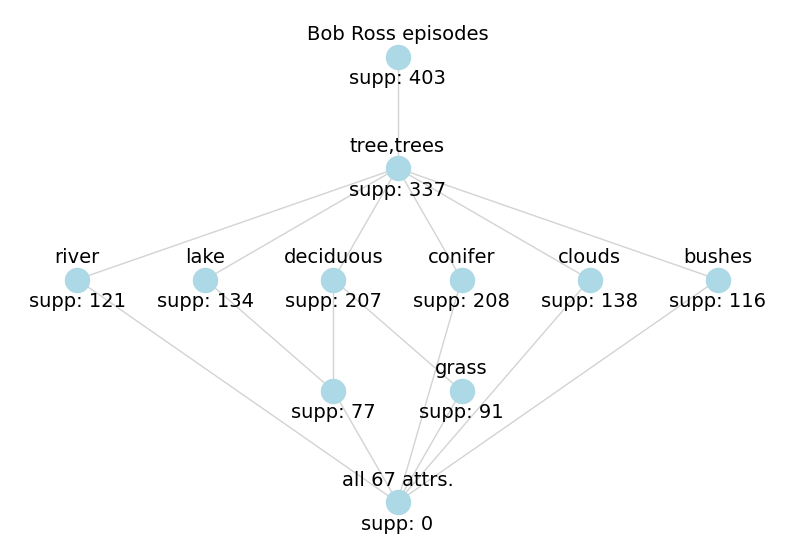

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

nx.draw_networkx(
    graph, pos=pos, labels=dict(enumerate(node_labels)), ax=ax,
    node_color='lightblue', edge_color='lightgray',
    font_size=14
)

plt.box(False)
plt.savefig('bob_ross_episodes_lattice.pdf')
plt.show()